In [1]:
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import pandas as pd

In [3]:
import scipy.stats as st

In [4]:
import math

In [5]:
df = pd.read_fwf("../data/lalonde_experimental.txt", header = None, colspecs=[(0, 10), (10, 20)])

In [6]:
df.columns = ['W', 'Y']

In [7]:
df['W'] = df['W'].apply(int)

### Question 1

a)

Using the t-statitic

In [8]:
N = df.shape[0]
M = df['W'].sum()

In [9]:
Y_1 = df[df.W == 1]['Y'].mean()
Y_0 = df[df.W == 0]['Y'].mean()

##### Computing the unbiased variance

In [69]:
s2_0 = df[df.W == 0]['Y'].var()
s2_1 = df[df.W == 1]['Y'].var()

##### Computing the variance of the difference of means

In [70]:
s2_dif = s2_0/(N - M) + s2_1/M

##### T-statistic

In [72]:
t_statistic = (Y_1 - Y_0)/(s2_dif ** 0.5)

In [73]:
p_value = 2 * (1 - st.norm.cdf(t_statistic))

In [74]:
print(f"Y_0 is {Y_0:.2f}, Y_1 is {Y_1:.2f}, the difference is {Y_1 - Y_0:.2f} and the t-statistic is {t_statistic:.6f} and the p-value is {p_value:.6f}")


Y_0 is 4.55, Y_1 is 6.35, the difference is 1.79 and the t-statistic is 2.674144 and the p-value is 0.007492


b)

##### Set K (number of draws)


In [15]:
#K = 1000000
K = 1000000

##### Under the null, both Y_0 and Y_1 are equal

In [16]:
# The set of assignment vector is comprised by N choose M, I set the universe of potential assignment

In [17]:
math.comb(N,M)

6083152392753576912837559233248532391555730573702937346458256906836883923573725070493581203256191523614142569625942938291437491993

Truly unfesiable to compute, using the approach of choosing directly

In [18]:
import numpy as np

In [19]:
stat_observed = Y_1 - Y_0

In [20]:
stat_observed

1.794341237006238

In [21]:
df['Y_1'] = df['Y'] 
df['Y_0'] = df['Y'] 

In [22]:
stat_distribution = []
# Draw a vector of assignments and compute the statistic
for i in range(K):
    W_c = np.random.choice(range(N), size = M, replace = False)
    stat_draw = df.loc[W_c]['Y_1'].mean() - df.drop(W_c)['Y_0'].mean()
    stat_distribution.append(stat_draw)

stat_distribution = np.array(stat_distribution)

In [23]:
p_value_exact = np.sum(abs(stat_distribution) > abs(stat_observed))/K

In [24]:
print(p_value_exact)

0.004297


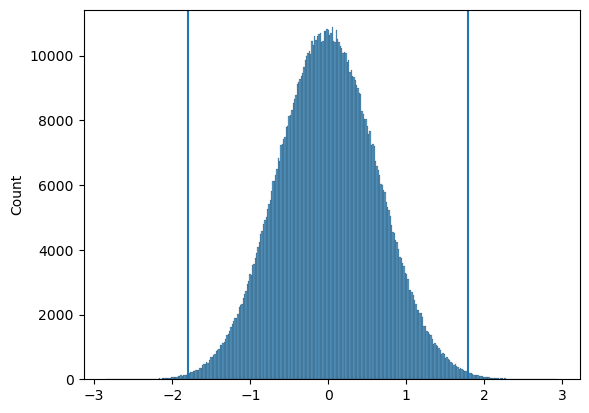

In [25]:
sns.histplot(stat_distribution)
plt.axvline(-stat_observed)
plt.axvline(stat_observed)

c)

Foreach observation compute the rank

In [26]:
df['R'] = df['Y'].apply(lambda y: (df['Y'] < y).sum() + 0.5 * (1 + (df['Y'] == y).sum()) - (N + 1)/2)

##### Checking it has mean zero

In [27]:
df['R'].mean()

0.0

Under the null, the ranks shouldn't change

In [28]:
df['R_0'] = df['R'] 
df['R_1'] = df['R'] 

In [29]:
stat_observed = df[df.W == 1]['R'].mean() - df[df.W == 0]['R'].mean()

In [30]:
stat_observed

31.01585239085239

In [31]:
stat_distribution = []
# Draw a vector of assignments and compute the statistic
for i in range(K):
    W_c = np.random.choice(range(N), size = M, replace = False)
    stat_draw = df.loc[W_c]['R_1'].mean() - df.drop(W_c)['R_0'].mean()
    stat_distribution.append(stat_draw)

stat_distribution = np.array(stat_distribution)

In [32]:
p_value_exact = np.sum(abs(stat_distribution) > abs(stat_observed))/K

In [33]:
print(p_value_exact)

0.010745


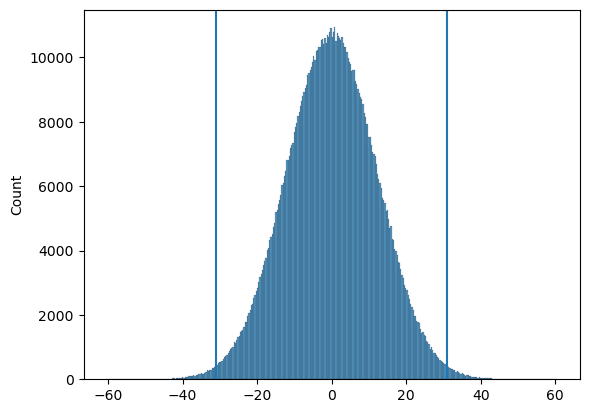

In [34]:
sns.histplot(stat_distribution)
plt.axvline(-stat_observed)
plt.axvline(stat_observed)

d)

##### Computing homoskedastic variance

In [75]:
df.loc[df.W == 0, 'bar_Y'] = Y_0
df.loc[df.W == 1, 'bar_Y'] = Y_1

In [76]:
df['error'] = df['Y'] - df['bar_Y']

In [77]:
s2_error = (df['error']**2).sum()/N

In [78]:
sum_w = ((df['W'] - df['W'].mean())**2).sum()

In [79]:
s2_homoskedastic = s2_error / sum_w

Confidence interval using Neyman variance

In [36]:
treatment_effect = Y_1 - Y_0

In [39]:
treatment_effect - 1.96 * s2_dif ** 0.5

0.31115797244518006

In [40]:
treatment_effect + 1.96 * s2_dif ** 0.5

3.277524501567296

##### Confidence interval using homoskedastic variance

In [86]:
treatment_effect = Y_1 - Y_0

In [87]:
treatment_effect - 1.96 * s2_homoskedastic ** 0.5

0.5567393723024845

In [88]:
treatment_effect + 1.96 * s2_homoskedastic ** 0.5

3.0319431017099916

In [93]:
df['error'].var()**0.5

6.57212684344308

In [92]:
df['Y'].var()**0.5

6.6314903092328175

##### Question 2

In [117]:
def get_N_equal_obs(beta, alpha, t0, sigma2):
    N = (st.norm.ppf(beta) + st.norm.ppf(1 - alpha/2))**2/(t0**2/sigma2)
    return N

In [118]:
def get_N_dif_obs(beta, alpha, t0, sigma2, gamma):
    N = (st.norm.ppf(beta) + st.norm.ppf(1 - alpha/2))**2/(gamma * (1-gamma) * t0**2/sigma2)
    return N

a)

In [119]:
beta = 0.8
alpha = 0.05
t0 = 1.79
sigma2 = 6.63
gamma = df['W'].mean()

Equal sizes

In [121]:
get_N_equal_obs(beta, alpha, t0, sigma2)

16.241088804573657

Different sizes

In [122]:
get_N_dif_obs(beta, alpha, t0, sigma2, gamma)

66.86365094648022

b)

In [123]:
beta = 0.8
alpha = 0.05
t0 = 0.11
sigma2 = 0.46
gamma = df['W'].mean()

Equal sizes

In [124]:
get_N_equal_obs(beta, alpha, t0, sigma2)

298.38716345459346

Different sizes

In [125]:
get_N_dif_obs(beta, alpha, t0, sigma2, gamma)

1228.4432025591657

c)

The effect size in the second case is relatively smaller to the variance than the first case. This requires a larger sample size to ensure that the null is being rejected when false.

When the effect size that is intended to test is small, the sample size to ensure a certain level of power is larger since the difference between means could be easily attributed to the randomness of the sample rather than a difference in means. By having a larger sample, we make sure that this differences are not attributable to the natural randomness of the variable, but instead to a difference in means in the subsamples.